In [1]:
import numpy as np 
from scipy.constants.constants import C2K, K2C
import math
from scipy import optimize as opt # for optimization
import matplotlib.pyplot as plt
from matplotlib import cm

In [29]:

PS_COEFF = np.zeros([10,10])
PS_COEFF[0][2]=0.24657688*np.power(10,6)
PS_COEFF[0][3]=0.51359951*np.power(10,2) 
PS_COEFF[1][2]=0.58638965*np.power(10,0) 
PS_COEFF[1][3]=-0.28646939*np.power(10,-2) 
PS_COEFF[1][4]=0.31375577*np.power(10,-4) 
PS_COEFF[2][2]=-0.62783840*np.power(10,1) 
PS_COEFF[2][3]=0.14791599*np.power(10,-1) 
PS_COEFF[2][4]=0.35779579*np.power(10,-3) 
PS_COEFF[2][5]=0.15432925*np.power(10,-7) 
PS_COEFF[3][3]=-0.42719875*np.power(10,0) 
PS_COEFF[3][4]=-0.16325155*np.power(10,-4) 
PS_COEFF[4][2]=0.56654978*np.power(10,4) 
PS_COEFF[4][3]=-0.16580167*np.power(10,2) 
PS_COEFF[4][4]=0.76560762*np.power(10,-1) 
PS_COEFF[5][3]=0.10917883*np.power(10,0) 
PS_COEFF[6][0]=0.38878656*np.power(10,13) 
PS_COEFF[6][1]=-0.13494878*np.power(10,9) 
PS_COEFF[6][2]=0.30916564*np.power(10,6)
PS_COEFF[6][3]=0.75591105*np.power(10,1) 
PS_COEFF[7][2]=-0.65537898*np.power(10,5) 
PS_COEFF[7][3]=0.18810675*np.power(10,3) 
PS_COEFF[8][0]=-0.14182435*np.power(10,14) 
PS_COEFF[8][1]=0.18165390*np.power(10,9) 
PS_COEFF[8][2]=-0.19769068*np.power(10,6)
PS_COEFF[8][3]=-0.23530318*np.power(10,2)
PS_COEFF[9][2]=0.92093375*np.power(10,5)
PS_COEFF[9][3]=0.12246777*np.power(10,3)

CS = np.zeros([10]) 

In [49]:
def calculate_coefficient_table(temperature):
    for i in range(0, len(PS_COEFF)):
        CS[i]=PS_COEFF[i][0]*np.power(temperature,-4)+PS_COEFF[i][1]*np.power(temperature,-2)\
        +PS_COEFF[i][2]*np.power(temperature,-1)\
        +PS_COEFF[i][3]+PS_COEFF[i][4]*temperature+PS_COEFF[i][5]*np.power(temperature,2)

#CALCULATE EQUATIONS OF STATE AND FUGACITY
#Solve Equation of state, Eq 2 of Pitzer and Sterner (1994)
#Returns pressure in Pa
def eos(T, V):
    den = 1/V
    R = 8314472
    var_num = CS[2]+2*CS[3]*den+3*CS[4]*np.power(den,2)+4*CS[5]*np.power(den,3)
    var_denom = np.power((CS[1]+CS[2]*den+CS[3]*np.power(den,2)+CS[4]*np.power(den,3)+CS[5]*np.power(den,4)),2)
    pressure=den+CS[0]*np.power(den,2)-np.power(den,2)*(var_num/var_denom)
    pressure= pressure + (CS[6]*np.power(den,2)*math.exp(-CS[7]*den)+CS[8]*np.power(den,2)*math.exp(-CS[9]*den))
    pressure = pressure*(R*T) #pressure in Pa
    return pressure

#Solve for fugacity, Eq 1 of Pitzer and Sterner (1994)
#Returns fugacity in MPa
def PSfug(P,T,V):
    den=1/V;
    R=8314472;
    quotient = CS[0]*den+(1/(CS[1]+CS[2]*den+CS[3]*np.power(den,2)+CS[4]*np.power(den,3)+CS[5]*np.power(den,4))-1/CS[1])
    quotient-= CS[6]/CS[7]*(math.exp(-CS[7]*den)-1)
    quotient-= CS[8]/CS[9]*(math.exp(-CS[9]*den)-1)
    lnf=(math.log(den)+ quotient+P/(den*R*T))+math.log(R*T)-1
    return math.exp(lnf)/1e6 # fugacity in MPa

#Optimizing equation to solve for volume
def fugacity_optimizer(temperature,pressure):

    def fun(v):
        return eos(temperature, v)- pressure
    volume = opt.brentq(fun, 5, 30) #Volume in cc/mo

    #Calculate fugacity 
    fugacity = PSfug(pressure, temperature, volume)
    
    return fugacity


In [64]:

fugacity_optimizer(573, 40)


ValueError: f(a) and f(b) must have different signs

In [6]:
CS = np.zeros([10])

import numpy as np
temp = range(400, 402)
temp = C2K(temp)
press = [400000000, 410000000]
fug = []
for t in temp:
    for p in press:
        cs = calculate_coefficient_table(t)
        fu = fugacity_optimizer(t,p)
        fug.append(fu)

print(fug)

[86.11912549447844, 89.26649890835894, 86.69906427970614, 89.86527649018399]


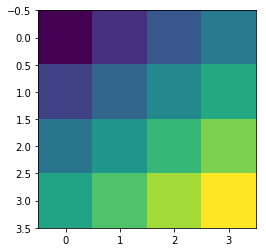

array([[  2.29260000e+11,   2.30060000e+11,   2.30860000e+11,
          2.31660000e+11],
       [  2.30406300e+11,   2.31210300e+11,   2.32014300e+11,
          2.32818300e+11],
       [  2.31552600e+11,   2.32360600e+11,   2.33168600e+11,
          2.33976600e+11],
       [  2.32698900e+11,   2.33510900e+11,   2.34322900e+11,
          2.35134900e+11]])

In [40]:
t = np.linspace(300, 306, 4, dtype=int)
t = C2K(t)
p = np.linspace(400, 406, 4, dtype=int)
p = p*1.0E6

def mesh_fun(xx, yy):
    zz = xx*yy
    return zz 

tt, pp = np.meshgrid(t, p)

zz = mesh_fun(tt, pp)

plt.imshow(zz)
plt.show()
zz

In [35]:
fug = []
print(type(t))
print(t)
for i in tt:
    for j in pp:
        cs = calculate_coefficient_table(i)
        fu = fugacity_optimizer(i,j)
        fug.append(fu)
print fug

<type 'numpy.ndarray'>
[ 573.15  575.15  577.15  579.15]


TypeError: only length-1 arrays can be converted to Python scalars

In [51]:
CS = np.zeros([10])
temperature = 659#[400]#, 401]#range(400, 402)

for i in range(0, len(PS_COEFF)):
    #for j in temperature:
    CS[i]=PS_COEFF[i][0]*np.power(temperature,-4)+PS_COEFF[i][1]*np.power(temperature,-2)\
    +PS_COEFF[i][2]*np.power(temperature,-1)\
    +PS_COEFF[i][3]+PS_COEFF[i][4]*temperature+PS_COEFF[i][5]*np.power(temperature,2)
    

print CS

[  5.13599510e+01   0.00000000e+00   0.00000000e+00  -4.27198750e-01
  -1.65801670e+01   1.09178830e-01   7.55911050e+00   1.88106750e+02
  -2.35303180e+01   1.22467770e+02]


In [31]:
CS2 = np.zeros([10])
temperature = 701#[400]#, 401]#range(400, 402)

for i in range(0, len(PS_COEFF)):
    #for j in temperature:
    CS2[i]=PS_COEFF[i][0]*np.power(temperature,-4)+PS_COEFF[i][1]*np.power(temperature,-2)\
    +PS_COEFF[i][2]*np.power(temperature,-1)\
    +PS_COEFF[i][3]+PS_COEFF[i][4]*temperature+PS_COEFF[i][5]*np.power(temperature,2)
    
print CS2

[  5.13599510e+01   0.00000000e+00   0.00000000e+00  -4.27198750e-01
  -1.65801670e+01   1.09178830e-01   7.55911050e+00   1.88106750e+02
  -2.35303180e+01   1.22467770e+02]


In [36]:
CS3 = np.zeros([10])
temperature = 772#[400]#, 401]#range(400, 402)

for i in range(0, len(PS_COEFF)):
    #for j in temperature:
    CS3[i]=PS_COEFF[i][0]*np.power(temperature,-4)+PS_COEFF[i][1]*np.power(temperature,-2)\
    +PS_COEFF[i][2]*np.power(temperature,-1)\
    +PS_COEFF[i][3]+PS_COEFF[i][4]*temperature+PS_COEFF[i][5]*np.power(temperature,2)

print CS3

[  5.13599510e+01   0.00000000e+00   0.00000000e+00  -4.27198750e-01
  -1.65801670e+01   1.09178830e-01   7.55911050e+00   1.88106750e+02
  -2.35303180e+01   1.22467770e+02]


In [34]:
del CS, CS2, CS3